# Propuesta Desafío 
Para el desafío ¿Cómo podríamos generar ingresos con los datos actuales que tiene nuestra organización?, se utilizará una base de datos de Telecom, libre al publico (https://www.kaggle.com/becksddf/churn-in-telecoms-dataset/data) que representara dicha información obtenida por la organización. 

In [1]:
import sklearn # aprendizaje automático / machine learning
from sklearn import preprocessing # manejar data no numerica 
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model

In [2]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp  # graficar data
import matplotlib.pyplot as plt  # graficar data
import numpy as np # manejar matrices
import os
import pandas as pd # procesamiento de datos, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # graficar data

In [3]:
df = pd.read_csv(r"D:\Escritorio2\1. Juan Carlos Salazar Mesa\2. Interacpedia\Desafio 1\bdTelecom.csv", header=0)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

La base de datos utilizada está completa ya que no tiene valores nulos. Pero de todas formas se utilizará el método describe() para revisar que los valores numéricos sean congruentes.

In [5]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
df["state"].nunique() # numero de estados

51

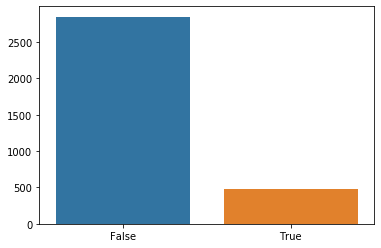

In [7]:
abandono = df["churn"].value_counts()
#print(abandono)
sns.barplot(abandono.index, abandono.values)

In [8]:
print(abandono)
y_True = df["churn"][df["churn"] == True] 
# crea una base de datos que cumpla la condición de usuario que abandonó la suscripción
print(y_True.head())
print("Porcentaje de abandono = "+str( (y_True.shape[0] / df["churn"].shape[0]) * 100 ))

False    2850
True      483
Name: churn, dtype: int64
10    True
15    True
21    True
33    True
41    True
Name: churn, dtype: bool
Porcentaje de abandono = 14.491449144914492


In [9]:
def porc_abandono(df):
    df['F'] = df.iloc[:, [0]]
    df['T'] = df.iloc[:, [1]]
    df['Total'] = df['F'] + df['T']
    df['Abandono'] = (df['T'] / df['Total'])*100      

Se puede concluir que los datos estan desbalanceados, ya que solamente 14.49% de los datos pertenecen a los usuarios que abandonaron. Ahora se revisará si esta tasa de abandono depende de otras variables como el estado de recidencia del usuario ya que podria indicar cambios en la señal. También se comparará el abandono según el código de área, si posee un plan internacional o plan de voz. 

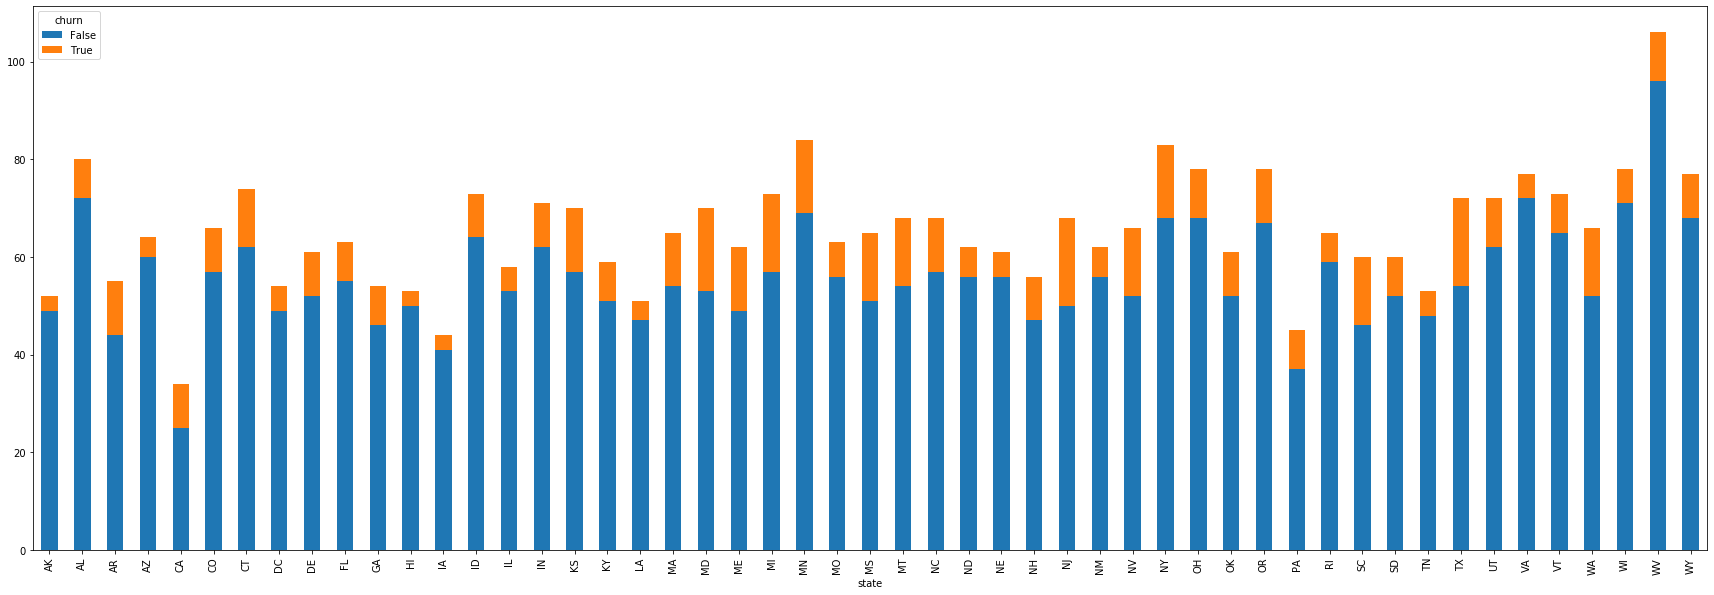

In [10]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

In [11]:
dfstate = df.groupby(["state", "churn"]).size().unstack()
porc_abandono(dfstate)
dfstate.sort_values(by=['Abandono'])

churn,False,True,F,T,Total,Abandono
state,,,,,,
HI,50,3,50,3,53,5.660377
AK,49,3,49,3,52,5.769231
AZ,60,4,60,4,64,6.250000
VA,72,5,72,5,77,6.493506
IA,41,3,41,3,44,6.818182
LA,47,4,47,4,51,7.843137
NE,56,5,56,5,61,8.196721
IL,53,5,53,5,58,8.620690
WI,71,7,71,7,78,8.974359


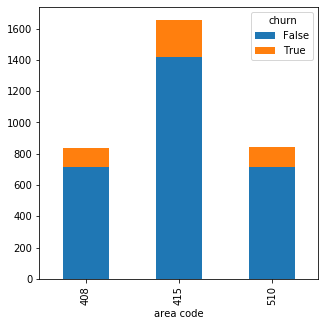

In [12]:
# 12 estados con % de abandono mayor o igual al 20%.
# 16 estados con % de abandono menor o igual a 10%.
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

In [13]:
dfcode = df.groupby(["area code", "churn"]).size().unstack()
porc_abandono(dfcode)
dfcode.sort_values(by=['Abandono'])
# El porcentaje de abandono por codigo de area es practicamente el mismo. 

churn,False,True,F,T,Total,Abandono
area code,,,,,,
415,1419,236,1419,236,1655,14.259819
408,716,122,716,122,838,14.558473
510,715,125,715,125,840,14.880952


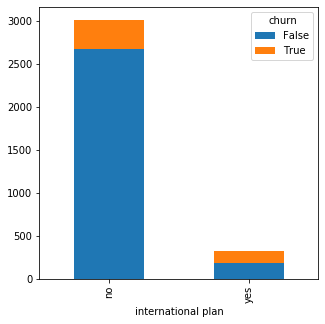

In [14]:
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

In [15]:
dfplan = df.groupby(["international plan", "churn"]).size().unstack()
porc_abandono(dfplan)
dfplan.sort_values(by=['Abandono'])
# Mucho mayor abandono (casi 4 veces más) sí tienen plan internacional,
# ya que utilizan el servicio y luego de un tiempo se salen.

churn,False,True,F,T,Total,Abandono
international plan,,,,,,
no,2664,346,2664,346,3010,11.495017
yes,186,137,186,137,323,42.414861


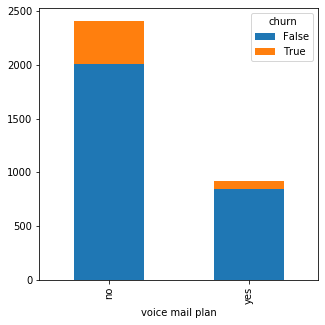

In [16]:
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

In [17]:
dfvoice = df.groupby(["voice mail plan", "churn"]).size().unstack()
porc_abandono(dfvoice)
dfvoice.sort_values(by=['Abandono'])
# Mucho mayor abandono (casi el doble) sí tienen plan de voz,
# ya que utilizan el servicio y luego de un tiempo se salen.

churn,False,True,F,T,Total,Abandono
voice mail plan,,,,,,
yes,842,80,842,80,922,8.676790
no,2008,403,2008,403,2411,16.715056


Sí hay una variación de porcentaje de usuarios que abandonan por estado, pero al analizarlo por código de área no hay variación lo que indica que la hipótesis de grandes cambios en la calidad de la señal, al menos entre grupos estatales sea falsa. En cambio, el porcentaje de abandono de un usuario varía en mayor medida sí el usuario tenía un plan internacional y/o un plan de voz. 
# Revisando los datos no numéricos

In [18]:
# Codificador discreto de valores enteros
label_encoder = preprocessing.LabelEncoder()

In [19]:
# Los Estados son caracteres y queremos enteros
df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])

#print (df['Voice mail plan'][:4])
print (df.dtypes)

state                       int32
account length              int64
area code                   int64
phone number               object
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [20]:
df.head()
# Los estados pasaron a ser entre 1 a 51, mientras que el plan internacional y el plan de voz pasaron a ser 0 o 1s. 

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [21]:
y = pd.DataFrame(df['churn']).to_numpy().astype(np.int)
y.size

3333

Quitar las columnas redundantes

In [22]:
# df = df.drop(["Id","Churn"], axis = 1, inplace=True)
df.drop(["phone number","churn"], axis = 1, inplace=True)

In [23]:
df.head(3)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0


Construir la matriz de características

In [24]:
X = pd.DataFrame(df).astype(np.float)
X

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16.0,128.0,415.0,0.0,1.0,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0
1,35.0,107.0,415.0,0.0,1.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0
2,31.0,137.0,415.0,0.0,0.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0
3,35.0,84.0,408.0,1.0,0.0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0
4,36.0,75.0,415.0,1.0,0.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3.0,192.0,415.0,0.0,1.0,36.0,156.2,77.0,26.55,215.5,126.0,18.32,279.1,83.0,12.56,9.9,6.0,2.67,2.0
3329,49.0,68.0,415.0,0.0,0.0,0.0,231.1,57.0,39.29,153.4,55.0,13.04,191.3,123.0,8.61,9.6,4.0,2.59,3.0
3330,39.0,28.0,510.0,0.0,0.0,0.0,180.8,109.0,30.74,288.8,58.0,24.55,191.9,91.0,8.64,14.1,6.0,3.81,2.0
3331,6.0,184.0,510.0,1.0,0.0,0.0,213.8,105.0,36.35,159.6,84.0,13.57,139.2,137.0,6.26,5.0,10.0,1.35,2.0


In [25]:
X.shape

(3333, 19)

In [26]:
y # 0 y 1s representando el abandono

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [27]:
y = y.ravel() #.ravel will convert that array shape to (n, )
y

array([0, 0, 0, ..., 0, 0, 0])

Se debe estandariza la matriz de características con StandardScaler


In [28]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

Utilizamos validación cruzada estratificada ya que los valores de respuesta no están balanceados.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

In [29]:
def stratified_cv(X, y, clf_class, shuffle=True, **kwargs):
    skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False) 
    # Number of folds. Must be at least 2.
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in skf.split(X, y):
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

# Construir Modelos y entrenar

https://scikit-learn.org/stable/modules/cross_validation.html

When the cv argument is an integer, cross_val_score uses the KFold or StratifiedKFold strategies by default, the latter being used if the estimator derives from ClassifierMixin.

It is also possible to use other cross validation strategies by passing a cross validation iterator instead, for instance:ShuffkeSplit

In [30]:
print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, svm.SVC))))
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, linear_model.LogisticRegression))))

Gradient Boosting Classifier:  0.95
Support vector machine(SVM):   0.92
Random Forest Classifier:      0.95
K Nearest Neighbor Classifier: 0.89
Logistic Regression:           0.86


# Matrices de confusion para varios modelos

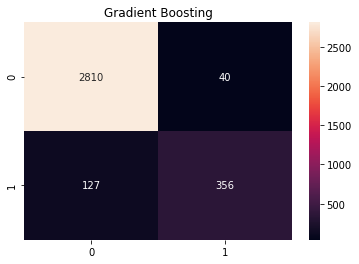

In [31]:
grad_ens_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))
sns.heatmap(grad_ens_conf_matrix, annot=True,  fmt='');
title = 'Gradient Boosting'
plt.title(title);

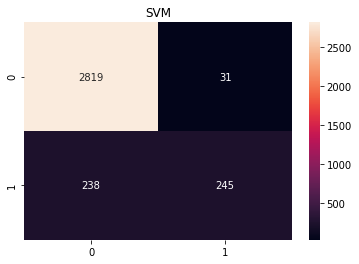

In [32]:
svm_svc_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, svm.SVC))
sns.heatmap(svm_svc_conf_matrix, annot=True,  fmt='');
title = 'SVM'
plt.title(title);

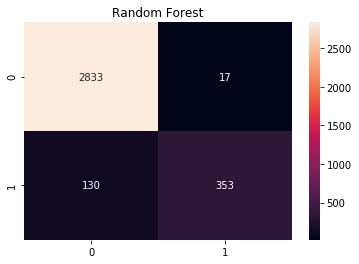

In [33]:
random_forest_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.RandomForestClassifier))
sns.heatmap(random_forest_conf_matrix, annot=True,  fmt='');
title = 'Random Forest'
plt.title(title);

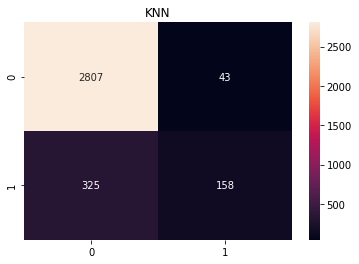

In [34]:
k_neighbors_conf_matrix   = metrics.confusion_matrix(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))
sns.heatmap(k_neighbors_conf_matrix, annot=True,  fmt='');
title = 'KNN'
plt.title(title);

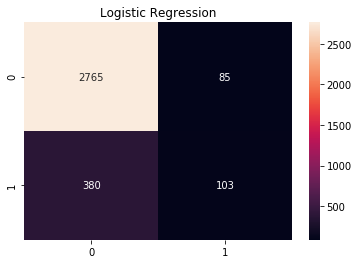

In [35]:
logistic_reg_conf_matrix  = metrics.confusion_matrix(y, stratified_cv(X, y, linear_model.LogisticRegression))
sns.heatmap(logistic_reg_conf_matrix, annot=True,  fmt='');
title = 'Logistic Regression'
plt.title(title);

# Reporte de clasificacion

In [36]:
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, svm.SVC))))
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, linear_model.LogisticRegression))))

Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2850
           1       0.89      0.73      0.81       483

    accuracy                           0.95      3333
   macro avg       0.93      0.86      0.89      3333
weighted avg       0.95      0.95      0.95      3333


Support vector machine(SVM):
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      2850
           1       0.89      0.51      0.65       483

    accuracy                           0.92      3333
   macro avg       0.90      0.75      0.80      3333
weighted avg       0.92      0.92      0.91      3333


Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2850
           1       0.94      0.73      0.82       483

    accuracy                           0.95      3333
   macro avg       0.95      0.86     

# Selección del modelo final

In [50]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X, y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

[0.00247176 0.00326328 0.00085859 0.09489364 0.01446266 0.06872106
 0.1630132  0.00450115 0.12739838 0.08718832 0.00082999 0.05588786
 0.01251564 0.00073493 0.0059249  0.04024141 0.11052474 0.04303986
 0.16352863]


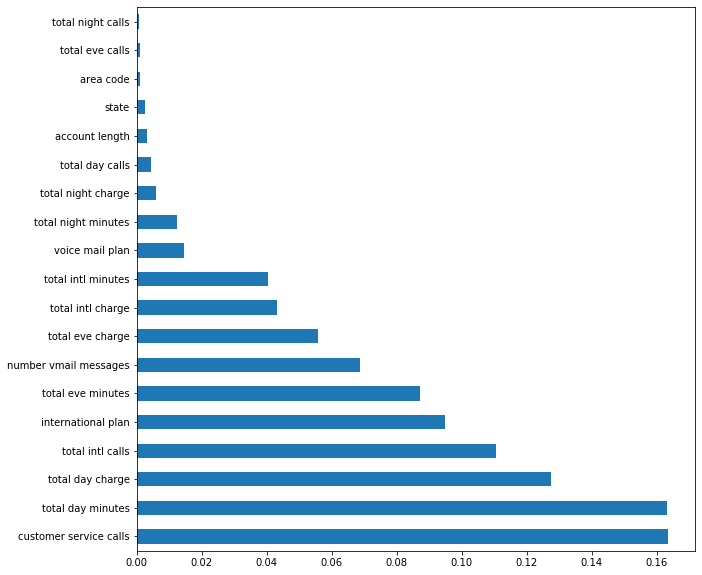

In [51]:
# Importancia por característica para el clasificador.
feature_importance = gbc.feature_importances_
print (gbc.feature_importances_)
feat_importances = pd.Series(gbc.feature_importances_, index=df.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

In [53]:
# Random Forrest CLassifier supera por poco GradientBoosting Classifier
rfc = ensemble.RandomForestClassifier()
rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

[0.02052142 0.02717416 0.00807795 0.08413017 0.02162351 0.03022692
 0.1380445  0.02985606 0.14218301 0.06322553 0.02799772 0.0666743
 0.03421187 0.02789926 0.03574536 0.04043277 0.04765682 0.0369402
 0.11737849]


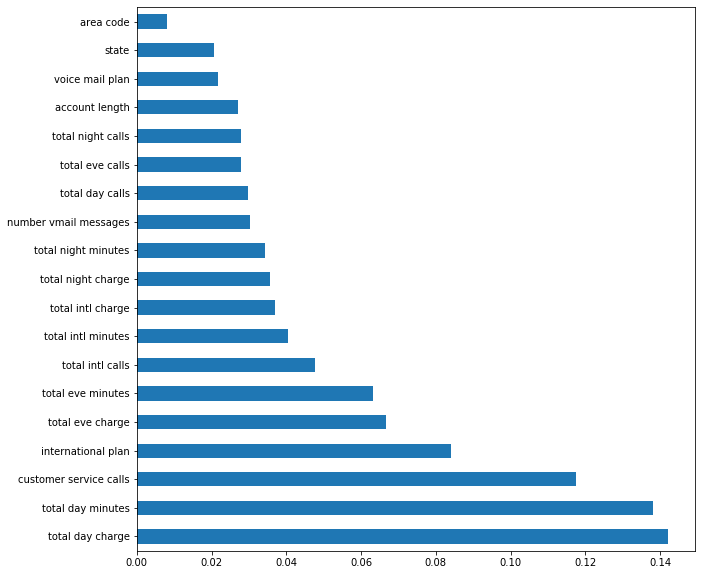

In [57]:
# Importancia por característica para el clasificador.
feature_importance = rfc.feature_importances_
print (rfc.feature_importances_)
feat_importances = pd.Series(rfc.feature_importances_, index=df.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

A pesar de lo precisos que son ambos modelos se nota que el clasificador de random forest le da una mayor importancia a caracterísitcas como el código de área, el estado,el plan de voz, la longevidad de la cuenta, etc. 

Ambos modelos tienen como las características que más contribuyen a predecir el abandono a la cantidad de llamadas de soporte técnico, los minutos totales consumidos en el día y la cantidad de plan cargado en el día. 

Adicionalmente, Random Forest tiene como la 4ta característica más importante para predecir el abandono de un usuario, al plan internacional, que como analisamos al inicio había 4 veces más probabilidad de abandono solo por haber adquirido este servicio.

# Conclusiones del desafío

Para el desafío ¿Cómo podríamos generar ingresos con los datos actuales que tiene nuestra organización?, se utilizó una base de datos pública de Telecom en Estados Unidos. Analizando la información recolectada, Telecom puede:

1. Identificar utilizando el modelo realizado de Random Forest o de gradient Boosting a los usuarios con mayor probabilidad para abandonar los servicios y ofrecerles mejoras o descuentos en el servicio.
2. En segundo lugar, comunicarse con los usuarios que abandonaron el servicio y adquirir información del porqué lo abandonaron para mejorar el algoritmo de predicción de abandono.
3. Revisar inicialmente los 4 principales indicadores o características permiten predecir el abandono y realizar ajustes. 

Por ejemplo:

- Para los planes internacionales, ya que muchas personas los tomas para hacer una llamada específica y debido a competidores como las llamadas por Whatsapp, se pueden realizar planes complementarios que incluyan servicios locales e internacionales donde el usuario perciba más beneficios por un valor un poco mayor. 

También se puede cobrar en menor tarifa por segundos consumidos en vez de minutos, esto también peude mejorar la percepción del precio de los planes y contribuir a la estabilidad del usuario.

- Las llamadas de servicio al cliente, en caso de que sean llamadas ofreciendo más servicios, establecer una organización del personal del call center para que no se realicen demasiadas llamadas al mismo número. Utilizar canales como correo u otros medios que no cansen al usuario. 

En caso de que estas llamadas sean en la otra dirección, llamadas de soporte que solicita el usuario se debe manejar un indicador que permita la solución rápida al usuario sin necesidad de múltiples llamadas. Utilizar plataformas con bots que resuelvan las dudas al usuario de la manera más práctica y sencilla posible, con videos u otros medios no explorados por la mayoría de las compañias.

- Utilizar estrategias donde el usuario pueda cambiar los servicios no utilizados en un mes específico para sumarlos a otro. Y llevar control de está información para ofrecer planes personalizados al cliente.

# Realizando pruebas de los modelos entrenados
Probando tamaño de los datos de prueba, cambios en cross validation y número de pliegues.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, y_train) 
X_test_transformed = scaler.transform(X_test)
score = clf.score(X_test_transformed, y_test)
print("%0.2f accuracy" % (score))

0.92 accuracy


In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1999, 19)
(1334, 19)
(1999,)
(1334,)


In [41]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
score = cross_val_score(clf, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

0.92 accuracy with a standard deviation of 0.008


In [42]:
n_samples = X.shape[0]
score = cross_val_score(clf, X, y, cv=cv)
print("%0.2f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

0.92 accuracy with a standard deviation of 0.006


A Pipeline makes it easier to compose estimators, providing this behavior under cross-validation:

In [43]:
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1).fit(X_train_transformed, y_train))
score = cross_val_score(clf, X, y, cv=cv)
print("%0.2f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))
scoreSVM = score.mean()

0.92 accuracy with a standard deviation of 0.006


In [44]:
clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
      max_depth=1, random_state=0).fit(X_train, y_train)
score2 = cross_val_score(clf2, X, y, cv=cv)
print("%0.2f accuracy with a standard deviation of %0.3f" % (score2.mean(), score2.std()))
scoreGBC = score2.mean()

0.88 accuracy with a standard deviation of 0.005


In [45]:
clf3 = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
score3 = cross_val_score(clf3, X, y, cv=cv)
print("%0.2f accuracy with a standard deviation of %0.3f" % (score3.mean(), score3.std()))
scoreRFC = score3.mean()
print(clf3.predict_proba(X_test).shape)
clf3.predict_proba(X_test)

0.86 accuracy with a standard deviation of 0.006
(1334, 2)


array([[0.68472456, 0.31527544],
       [0.90159646, 0.09840354],
       [0.89089783, 0.10910217],
       ...,
       [0.89386834, 0.10613166],
       [0.89503326, 0.10496674],
       [0.70114037, 0.29885963]])

In [46]:
print('Gradient Boosting Classifier:  {:.2f}'.format(scoreGBC))
print('Support vector machine(SVM):   {:.2f}'.format(scoreSVM))
print('Random Forest Classifier:      {:.2f}'.format(scoreRFC))
print('K Nearest Neighbor Classifier: {:.2f}'.format(0))
print('Logistic Regression:           {:.2f}'.format(0))

Gradient Boosting Classifier:  0.88
Support vector machine(SVM):   0.92
Random Forest Classifier:      0.86
K Nearest Neighbor Classifier: 0.00
Logistic Regression:           0.00
